<br>

<div style ="width: 100%;">
<table style ="width: 100%;background-color:float:center;">
<tr>

</tr>
    
<tr>
        
<td>
<div style="font-size: 21px;Margin-left:-10px;">
<b>Lógica Computacional TP1<b>
</div>
    <br>
    <br>
<div style="font-size: 16px;">
    
Realizado por:

Miguel Gonçalves a90416
 
João Nogueira a87973
</div>
</td>
<td >
<div style="display:inline-block; float:right;Margin-right:0px;Margin-top:20px;">
<img src="https://www.ecum.uminho.pt/SiteAssets/ECUM-PT.png" width="260" height="120">
<div>
</td>
</tr>
</table>
</div>


1. Um sistema de tráfego  é representado por um grafo orientado ligado. Os nodos denotam pontos de acesso e  os arcos denotam vias de comunicação só com um sentido . 
    >  O grafo tem de ser ligado o que significa que entre cada par de nodos $\langle n_1,n_2 \rangle$ tem de existir um caminho $n_1 \leadsto n_2$ e um caminho $n_2\leadsto n_1$.
    1. Gerar aleatoriamente um tal grafo com  $N=32$ nodos.  Cada nodo tem um número aleatório de descendentes no intervalo $\,1..3\,$  cujos destinos são distintos entre si do nodo origem.
    2. Pretende-se fazer  manutenção interrompendo  determinadas vias. Determinar o maior número de vias que é possível remover mantendo o grafo ligado.

Para a resolução da alinea a) criamos a função gera_grafo que recebe um n, sendo esse n o número de nodos que queremos que o nosso grafo tenha. Usamos o Digraph pois queremos que o nosso grafo seja direcionado e adicionamos os nodos pretendidos ao grafo. Posteriormente fazemos a verificação se o grafo é fortemente conectado com a ajuda da função is_strongly_connected do networkx e adicionamos as restrições pretendidas, ou seja, cada nodo nao pode ter mais do que três descendentes e os destinos são diferentes da origem. 



In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def gera_grafo(n): 
    G = nx.DiGraph()
    dic = []
    
    for i in range(n):
        G.add_node(i+1)

    while not nx.is_strongly_connected(G):
        for i in range(n): 
            vizinhos = [n for n in G.neighbors(i+1)]
            conecta = random.randint(1,n)
            while conecta==i+1:
                conecta = random.randint(1,n)
            vizinhos2 = [n for n in G.neighbors(conecta)]
            while (conecta,i+1) not in dic and len(vizinhos)<3 and len(vizinhos2)<3: 
                dic.append((conecta,i+1))
                dic.append((conecta,i+1))
                G.add_edge(conecta,i+1)
                G.add_edge(i+1,conecta)

    return G



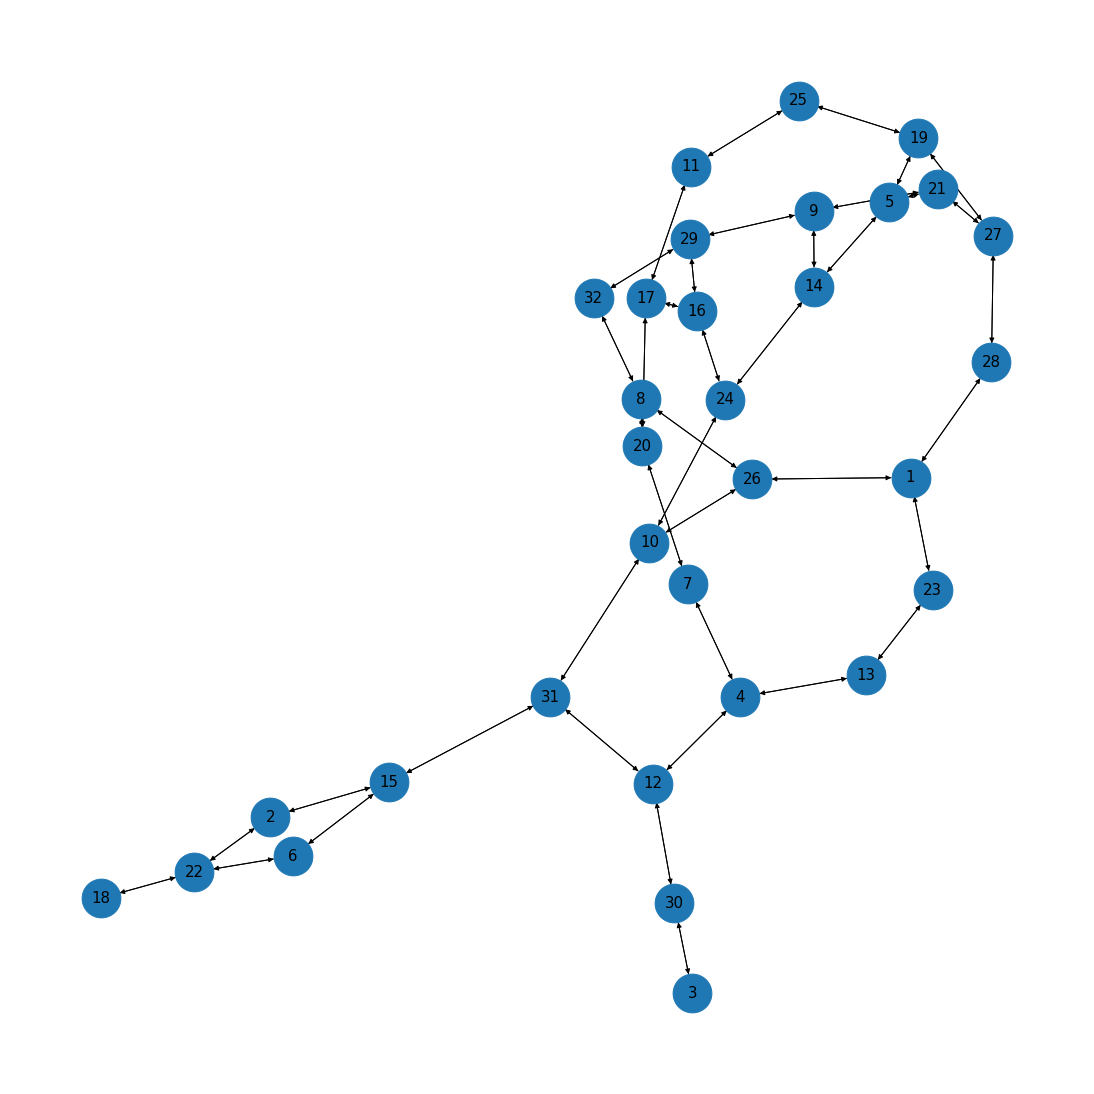

In [2]:
G = gera_grafo(32)
plt.figure(figsize=(15,15))
pos = nx.spring_layout(G) 
nx.draw(G, pos, font_size=15 , with_labels = True, node_size=1500)

## Restrições: 

1. $\forall_{o,d\in V} \cdot \sum_{p \in P} x_p \ge 1$ Esta restrição garante que para cada par de vertices, existe pelo menos um caminho entre eles
2. $\sum_{e \in x} x_e$ Minimizar o número total de caminhos entre todos os vértices do grafo

Onde o,d representa o caminho de o para d, V os vertices e P os caminhos entre cada par de vertices 

In [1]:
from ortools.linear_solver import pywraplp

def arestas(p): 
    return [(p[i],p[i+1]) for i in range(len(p)-1)]

def max_remove(graph): 
    sol = pywraplp.Solver.CreateSolver('SCIP')
    d = {}
    for e in graph.edges(): 
        d[e] = sol.BoolVar(str(e))
    x = {} 


    for s in graph.nodes:
        for t in graph.nodes:
            if s!=t:
              ps = list(nx.all_simple_paths(graph,s,t))
              for i in range(len(ps)):
                x[i] = sol.BoolVar(str(i) + ',' + str(s)+ ',' + str(t))
                for e in arestas(ps[i]):
                  sol.Add(d[e]>=x[i])
                sol.Add(sum(d[j] for j in arestas(ps[i]))<=x[i] + len(arestas(ps[i]))-1)
              sol.Add(sum(x.values()) >= 1) 
              x = {}

        
    sol.Minimize(sum(d.values()))
    assert(sol.Solve() == pywraplp.Solver.OPTIMAL)

    return [ e for e in graph.edges() if round(d[e].solution_value()) == 0]  

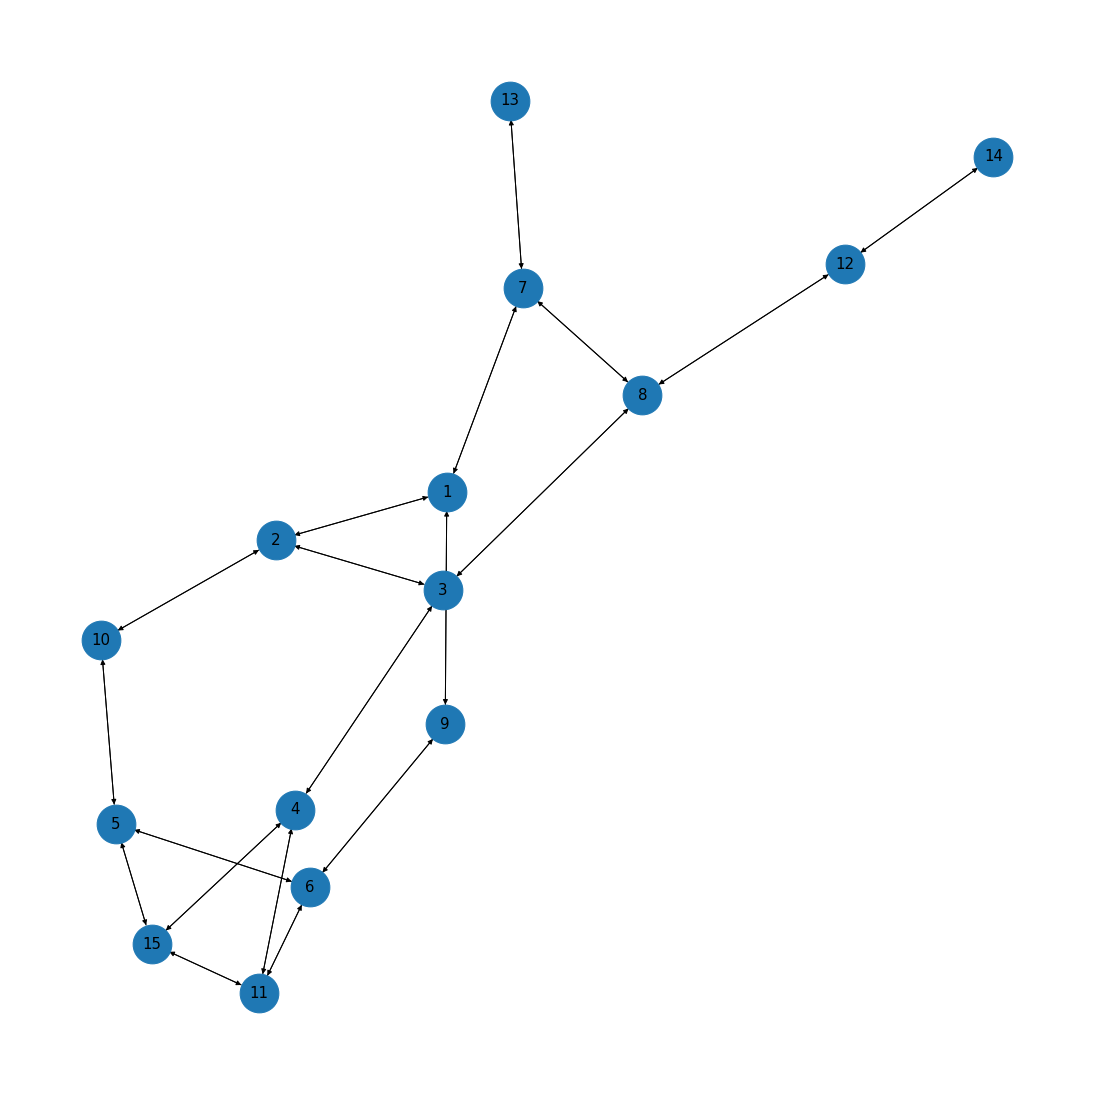

In [8]:
grafo_mais_pequeno = gera_grafo(15)
plt.figure(figsize=(15,15))
pos = nx.spring_layout(grafo_mais_pequeno) 
nx.draw(grafo_mais_pequeno, pos, font_size=15 , with_labels = True, node_size=1500)

Maior número de vias que é possível remover:  20


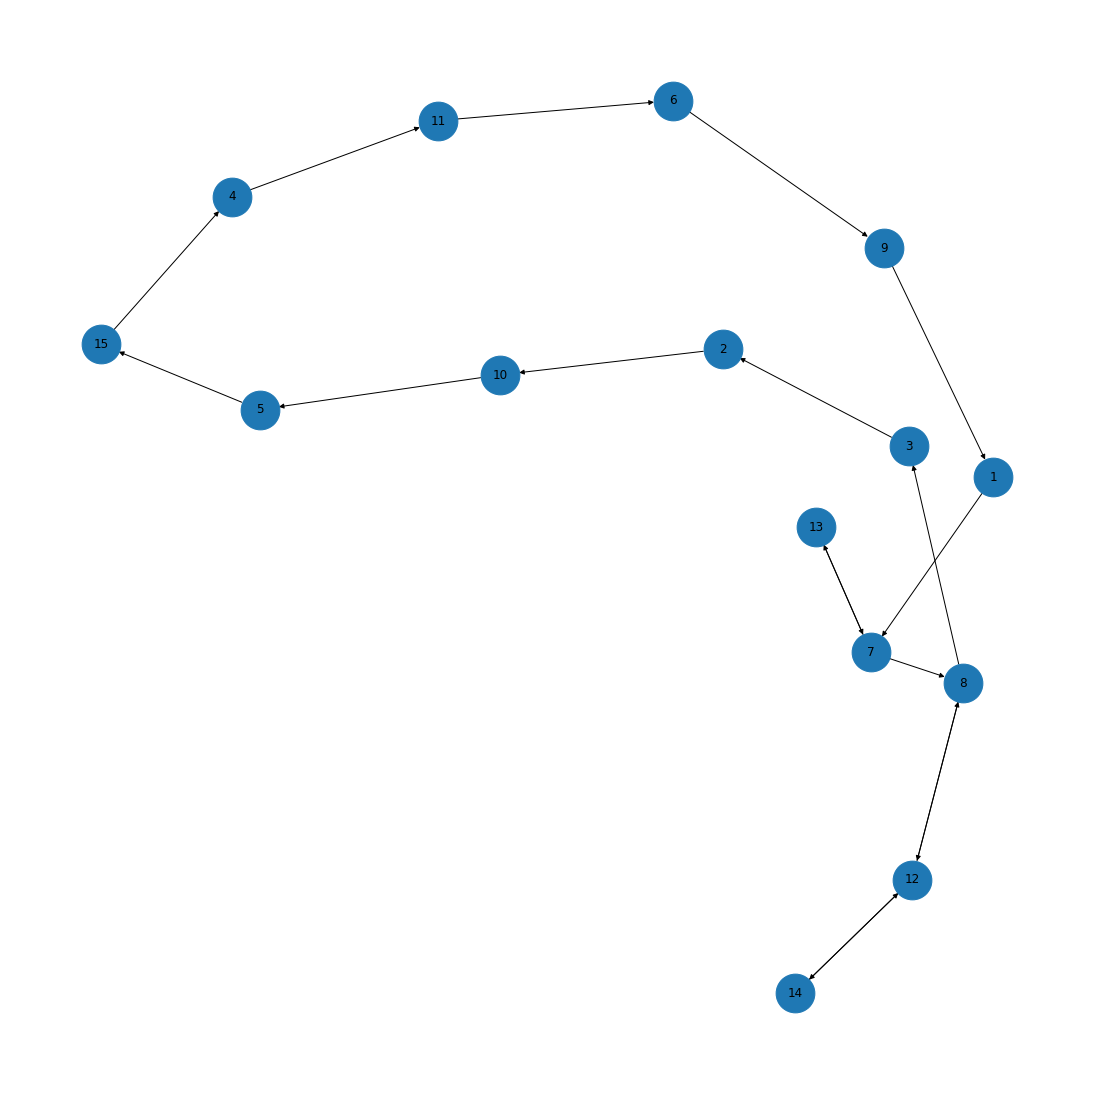

In [9]:
y=max_remove(grafo_mais_pequeno)
final = grafo_mais_pequeno.copy()
plt.figure(figsize=(15,15))
for (o,d) in grafo_mais_pequeno.edges():
    if (o,d) in y:
        final.remove_edge(o,d)
nx.draw(final, with_labels = True,node_size=1500)
print("Maior número de vias que é possível remover: ",len(y))
